# Estadística inferencial

# Prueba t-student Hipótesis de Prueba: "No hay diferencia significativa en el número de estudiantes en educación superior entre diferentes entidades federativas (Tamaulipas y Campeche)."

In [3]:
import pandas as pd
import scipy.stats as stats

In [4]:
file_paths = [
    'C:/Users/jefsantos/Downloads/Hogares_11.xlsx',
    'C:/Users/jefsantos/Downloads/Educacion_06.xlsx',
    'C:/Users/jefsantos/Downloads/Hogares_13.xlsx',
    'C:/Users/jefsantos/Downloads/poblacion economicamente activa.xlsx',
    'C:/Users/jefsantos/Downloads/Poblacion_01.xlsx'
]

dataframes = [pd.read_excel(path) for path in file_paths]

# Población Económicamente Activa (PEA)
pea_df = dataframes[3]
pea_df['Promedio'] = pea_df.iloc[:, 1:-2].mean(axis=1)

# Niveles educativos 
educacion_df = dataframes[1]
educacion_superior_df = educacion_df[educacion_df['Nivel educativo'].str.contains("Superior")]
educacion_superior_df['2022/2023_Total'] = educacion_superior_df.filter(regex='2022/2023').apply(pd.to_numeric, errors='coerce').sum(axis=1)
educacion_superior_total = educacion_superior_df.groupby('Entidad federativa')['2022/2023_Total'].sum().reset_index()

C:\Users\jefsantos\AppData\Local\Temp\ipykernel_41136\1209910301.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educacion_superior_df['2022/2023_Total'] = educacion_superior_df.filter(regex='2022/2023').apply(pd.to_numeric, errors='coerce').sum(axis=1)


In [5]:
def preparar_datos_para_ttest(df, entidad):
    datos = df[df['Entidad federativa'] == entidad].filter(regex='2022/2023')
    datos = datos.apply(pd.to_numeric, errors='coerce').dropna()
    return datos.values.flatten()

In [9]:
entidades_seleccionadas = educacion_superior_total.sample(n=2, random_state=1)
entidades_seleccionadas

,Entidad federativa,2022/2023_Total
27,Tamaulipas,135883
3,Campeche,29520


In [6]:
datos_entidad_1_ttest = preparar_datos_para_ttest(educacion_superior_df, entidades_seleccionadas.iloc[0]['Entidad federativa'])
datos_entidad_2_ttest = preparar_datos_para_ttest(educacion_superior_df, entidades_seleccionadas.iloc[1]['Entidad federativa'])
if len(datos_entidad_1_ttest) > 1 and len(datos_entidad_2_ttest) > 1:
    t_test_result = stats.ttest_ind(datos_entidad_1_ttest, datos_entidad_2_ttest, equal_var=False)
else:
    t_test_result = "No hay suficientes datos para realizar la prueba t"

t_test_result

TtestResult(statistic=3.029792901985129, pvalue=0.08413366550494716, df=2.185910165698693)

# Interpretación de la prueba t-student

Estadístico t (3.030): un valor de 3.030 es relativamente alto, lo que sugiere una diferencia notable entre 
    las medias de los dos grupos.

Valor p (0.084): un valor p inferior a 0.05 se considera 
    estadísticamente significativo. En tu caso, un valor p de 0.084 está por encima de este umbral convencional, lo que 
    significa que, aunque hay una diferencia notable entre las medias de los grupos, no alcanza el nivel convencional de 
    significancia estadística.

Conclusión General:
La hipótesis nula en este caso sería que no hay diferencia significativa en el número de estudiantes en educación superior entre Tamaulipas y Campeche. Dado que el valor p es mayor que 0.05, no podemos rechazar esta hipótesis nula. Sin embargo, el valor p relativamente bajo (cercano a 0.05) y el alto estadístico t podrían indicar una tendencia o una diferencia prácticamente relevante que podría  explorarse más con un tamaño de muestra más grande o en investigaciones adicionales.

# Prueba distribución normal Hipótesis: "La distribución de los ingresos del trabajo en los hogares en diferentes entidades federativas sigue una distribución normal."

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest

In [14]:
# dataset de Hogares (Hogares_11.xlsx)
hogares_df = dataframes[0]
datos_ingreso_trabajo = hogares_df['Ingreso del trabajo']

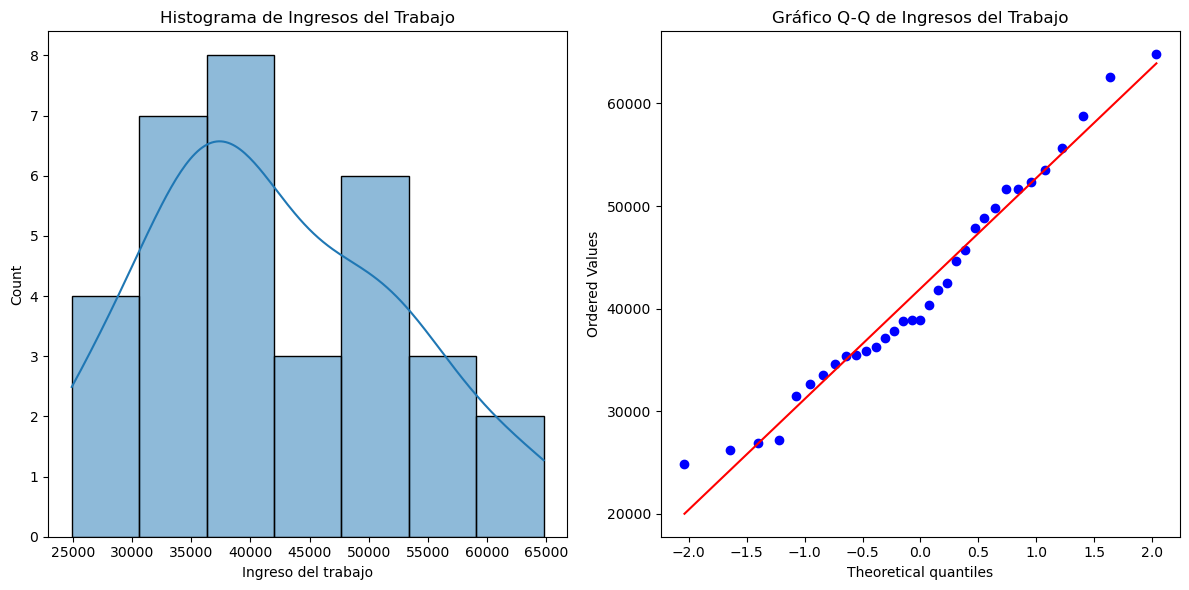

(ShapiroResult(statistic=0.9661164283752441, pvalue=0.3809964060783386),
 NormaltestResult(statistic=1.4160799515771496, pvalue=0.4926087769822014))

In [15]:
shapiro_test = shapiro(datos_ingreso_trabajo)
dagostino_test = normaltest(datos_ingreso_trabajo)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(datos_ingreso_trabajo, kde=True)
plt.title('Histograma de Ingresos del Trabajo')
plt.subplot(1, 2, 2)
stats.probplot(datos_ingreso_trabajo, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Ingresos del Trabajo')
plt.tight_layout()
plt.show()

shapiro_test, dagostino_test

# Interpretación de la prueba normal

Los resultados de las pruebas de normalidad (Shapiro-Wilk y D'Agostino's K-squared) junto con las visualizaciones (histograma y gráfico Q-Q) se enfocaron en analizar si la distribución de los ingresos del trabajo en los hogares, según el conjunto de datos proporcionado, sigue una distribución normal. Aquí está la interpretación detallada de estos resultados:

Prueba de Shapiro-Wilk:

Estadístico de Shapiro: 0.966
Valor p: 0.381
Interpretación: El valor p es mayor que el umbral típico de 0.05, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula de que los datos se distribuyen normalmente. Esto sugiere que la distribución de los ingresos del trabajo se aproxima a una distribución normal.
Prueba de D'Agostino's K-squared:

Estadístico de D'Agostino: 1.416
Valor p: 0.493
Interpretación: Al igual que en la prueba de Shapiro-Wilk, el valor p es mayor que 0.05, lo que sugiere que no hay razón suficiente para rechazar la hipótesis nula de normalidad. Esto refuerza la idea de que los ingresos del trabajo podrían estar normalmente distribuidos.

Visualizaciones:

Histograma y Gráfico Q-Q:
Interpretación: El histograma con la línea de densidad KDE muestra una forma que se asemeja a una distribución normal, aunque con algunas desviaciones. El gráfico Q-Q compara los cuantiles de los datos con los cuantiles esperados de una distribución normal; los puntos se alinean en gran medida con la línea, lo que indica una similitud con una distribución normal, aunque con algunas desviaciones en los extremos.

Conclusión General:
La combinación de los resultados de las pruebas estadísticas y las visualizaciones sugiere que la distribución de los ingresos del trabajo en los hogares en las entidades federativas, según este conjunto de datos, es aproximadamente normal. Sin embargo, es importante tener en cuenta que la normalidad perfecta es rara en datos reales, y las pequeñas desviaciones observadas pueden ser importantes dependiendo del contexto específico del análisis.

Estos hallazgos podrían ser relevantes para entender la distribución de ingresos en el contexto de tu proyecto, especialmente si se considera la relación entre los niveles de ingreso y la demanda de educación en ingeniería en logística y manufactura.

# Prueba T-student Hipótesis Nula (H0): No hay diferencia significativa en los ingresos del trabajo entre las entidades federativas con ingresos por encima de la mediana y aquellas con ingresos por debajo de la mediana.

# Hipótesis Alternativa (H1): Existe una diferencia significativa en los ingresos del trabajo entre las entidades federativas con ingresos por encima de la mediana y aquellas con ingresos por debajo de la mediana.

In [17]:
ingresos_df = dataframes[0]
mediana_ingresos = ingresos_df['Ingreso del trabajo'].median()
grupo_alto = ingresos_df[ingresos_df['Ingreso del trabajo'] > mediana_ingresos]['Ingreso del trabajo']
grupo_bajo = ingresos_df[ingresos_df['Ingreso del trabajo'] <= mediana_ingresos]['Ingreso del trabajo']
t_test_ingresos = stats.ttest_ind(grupo_alto, grupo_bajo, equal_var=False)

t_test_ingresos

TtestResult(statistic=8.076850353917107, pvalue=1.586006230572302e-08, df=25.752233815084146)

# Interpretación de la prueba t-student

Estadístico t: 8.077
Valor p: Aproximadamente 1.59e-08
Interpretación:

El estadístico t es bastante alto (8.077), lo que indica una diferencia sustancial en los ingresos medios del trabajo entre los dos grupos.
El valor p es extremadamente bajo (cercano a 0), mucho menor que el umbral convencional de 0.05 para significancia estadística. Esto indica que la diferencia observada en los ingresos del trabajo entre los grupos es estadísticamente significativa.

Conclusión:
Según esta prueba, hay una diferencia significativa en los ingresos del trabajo entre las entidades federativas con ingresos por encima de la mediana y aquellas con ingresos por debajo de la mediana. Este resultado sugiere que existe una variabilidad considerable en los ingresos del trabajo entre diferentes entidades federativas.

Esto nos llevó a rechazar la hipótesis nula y aceptar la hipótesis alternativa, indicando que efectivamente existe una diferencia significativa en los ingresos del trabajo entre estos dos grupos de entidades federativas.